In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Replace 'your_file.csv' with your actual file path
data = pd.read_excel('dados_hidro.xlsx')

# Assuming 'discharge' is the target column
target = data['discharge']

# Assuming  'precip', and 'eto' are feature columns
features = data[['precip', 'eto']]


In [3]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, random_state=42)

# Separate the target variable ('discharge') from the input features
X_train_features = X_train[['precip', 'eto']]
y_train = X_train['discharge']

# Split the data into training and validation sets
X_valid_features = X_valid[['precip', 'eto']]
y_valid = X_valid['discharge']

In [4]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation features
X_train_scaled = scaler.fit_transform(X_train_features)
X_valid_scaled = scaler.transform(X_valid_features)

In [5]:
# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(200, 100, 50), activation='relu', solver='adam', max_iter=100000, random_state=42)

In [6]:
# Train the model
model.fit(X_train_scaled, y_train)


# Make predictions on the validation set
predictions = model.predict(X_valid_scaled)



In [7]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_valid, predictions)


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.8197526718763297
Root Mean Squared Error (RMSE): 1.348982087307437
R-squared (R2): 0.11864848342722967


In [8]:
# Create a DataFrame with predictions and original values
result_df = pd.DataFrame({'Original': y_valid, 'Predictions': predictions})

# Export the DataFrame to an Excel file
result_df.to_excel('predictions_results.xlsx', index=False)

In [9]:
# Create a new data point with precip of 2 and eto of 2
new_data_point = np.array([[2, 2]])  # Shape should match the input shape expected by the model

# Predict using the trained model for the new data point
predicted_discharge = model.predict(new_data_point)

print("Predicted Discharge:", predicted_discharge)

Predicted Discharge: [2.36588675]


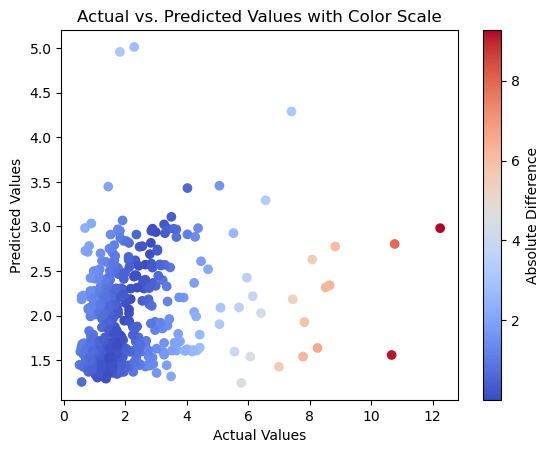

In [10]:


# Calculate the absolute differences between predicted and actual values
differences = np.abs(predictions - y_valid)

# Create a scatter plot with color scale based on the differences
plt.scatter(y_valid, predictions, c=differences, cmap='coolwarm')
plt.colorbar(label='Absolute Difference')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Color Scale")
plt.show()

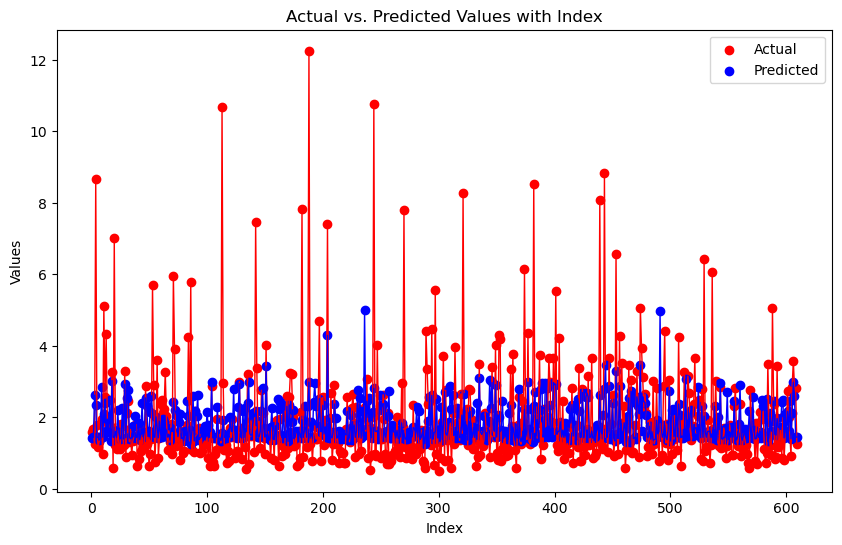

In [11]:
# Calculate the absolute differences between predicted and actual values
differences = np.abs(predictions - y_valid)

# Create a dataframe with the index and the differences
data = pd.DataFrame({'Index': range(1, len(y_valid) + 1), 'Differences': differences})

# Create a scatter plot with x-axis as the 'Index' column
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.scatter(data['Index'], y_valid, color='red', label='Actual')
plt.scatter(data['Index'], predictions, color='blue', label='Predicted')
plt.plot(data['Index'], y_valid, color='red', linestyle='-', linewidth=1, label='_nolegend_')  # Connect actual values with a red line
plt.plot(data['Index'], predictions, color='blue', linestyle='-', linewidth=1, label='_nolegend_')  # Connect predicted values with a blue line
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values with Index")
plt.legend()

# Save the figure as an image file (e.g., PNG)
plt.savefig("scatter_plot.jpeg", dpi=300)  # Specify file name and resolution
plt.show()

In [12]:
import joblib

# Assuming you have a trained model named 'model'
model_path = 'saved_model.joblib'  # Specify the path where you want to save the model

# Save the model to a file
joblib.dump(model, model_path)

# Load the model from the file
# loaded_model = joblib.load(model_path)


['saved_model.joblib']